# Question 2: Trapezoidal and Simpson's rules for integration and their errors
## Part a: Evaluating the error function and the error incurred using two numerical integration methods
The error function is defined as follows:
\begin{equation}
    \mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2}\mathrm{d}t
\end{equation}
We will be looking to evaluate the error function at $x = 3$. Mathematically, we will be evaluating the integral:
\begin{equation}
    \mathrm{erf}(3) = \frac{2}{\sqrt{\pi}} \int_0^3 e^{-t^2}\mathrm{d}t
\end{equation}
### i) Evaluate $\mathrm{erf}(3)$ using Trapezoid rule and Simpson's rule both for $N=10$ steps and compare their results with scipy's value.

In [1]:
#PART A
#i) 
#import packages
import numpy as np
from scipy.special import erf

In [2]:
#define a function for Trapezoid rule 
def Trapzzz(funktion, N, a, b):
    """
    A function for performing numerical integration of the mathematical function denoted funktion according to 
    the trapezoid rule for N steps between a and b.
    INPUT:
    funktion [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    h = (b-a)/N #width of slices
    s = 0.5*funktion(a) + 0.5*funktion(b) #the constant terms in the series expansion defining the trapezoid rule as in equation 5.3 of Newman

    for j in range(1,N):
        s += funktion(a+j*h)
        
    the_integral = h*s
    return the_integral

#define a function for Simpson's rule
def Simpson(funktion, N, a, b):
    """
    A function for performing numerical integration of the mathematical funktion according to
    Simpson's rule for N steps between a and b.
    INPUT:
    funktion [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    h = (b-a)/N #width of slices
    s = funktion(a) + funktion(b) #the constant terms in the series expansion defining the trapezoid rule as in equation 5.3 of Newman
    
    for k in range(1,N,2): #loop over odd terms
        s += 4*funktion(a+k*h)
    for k in range(2,N,2): #loop over even terms
        s += 2*funktion(a+k*h)
        
    the_integral = h*s/3
    return the_integral

In [3]:
#define function to be integrated
def the_fun(t):
    return np.exp(-t**2)


In [4]:
#define number of steps N, LB a, and UB b
N = 10
a = 0
b = 3

#a function for evaluating relative error
def RelativeErr(accepted, measured):
    return (measured-accepted)/accepted

#the integrals above multiplied by 2/sqrt(pi) are an approximation of the error function erf(x) evaluated at x=3, by definition
erf_Trapezoid = (2/np.sqrt(np.pi))*Trapzzz(the_fun, N, a, b) #erf(3) approximated by Trapezoid rule with N=10 steps

erf_Simpson = (2/np.sqrt(np.pi))*Simpson(the_fun, N, a, b) #erf(3) approximated by Simpson's rule with N=10 steps

erf_SCIpy = erf(3) #evaluating erf(3) using scipy's built in error function
print('The built-in error function from scipy.optimize evaluated at 3 yields: {0}'.format(erf_SCIpy))

err_Trapezoid_10 = RelativeErr(erf_SCIpy, erf_Trapezoid) #relative error between Trapezoid approximation for N=10 steps and scipy's value
print('Trapezoid approximation of erf(3) yields {0}, with relative error to scipy value of {1}.'.format(erf_Trapezoid, err_Trapezoid_10))

err_Simpson_10 = RelativeErr(erf_SCIpy, erf_Simpson) #relative error between Trapezoid approximation for N=10 steps and scipy's value
print('Simpsons approximation of erf(3) yields {0}, with relative error to scipy value of {1}.'.format(erf_Simpson, err_Simpson_10))

The built-in error function from scipy.optimize evaluated at 3 yields: 0.9999779095030014
Trapezoid approximation of erf(3) yields 0.9999719125941186, with relative error to scipy value of -5.9970413604346325e-06.
Simpsons approximation of erf(3) yields 0.9999770112979359, with relative error to scipy value of -8.982249076706578e-07.


Note: the float values depicted below were intentionally not formatted to a lesser number of 'significant figures' in order to depict the agreeances of the numerical approximations with scipys value up to a certain number of digits. In particular, it can be observed that the Trapezoid rule produced an approximation accurate with scipy's value up to 5 decimals places, and Simpson's rule produced an approximation accurate with scipy's value up to 6 digits. These are excellent degrees of accuracy for most practical applications, whih is remarkable for integrating with only 10 steps!

### ii) How many steps $N$ do we need for each method of Trapezoid rule and Simpson's rule integration to achieve relative error to scipy's value of order $10^{-11}$?
Since we are only looking for an order of magnitude we can evaluate the integrals for each method for different values of $N$ incrementing by factors of 10. This will save us on computation time in comparison to computing the integral approximations for increments of $1$ each step. 

In [5]:
#ii)  
N_Trapezoid = 10 #starting value for N. We already approximated the integral for N=10, so as soon as we enter the while loop N will be incrememnted to 100 (factor of 10 increment)
err_Trapezoid_new = abs(err_Trapezoid_10) #initial value for relative error for trapezoid method from N=10 approximation to enter the while loop
while err_Trapezoid_new>10**(-11): #we will keep computing the integral approximation and relative error for values of N incrementing by factors of 10 untill our error no longer exceeds our desired order of e-11
    N_Trapezoid *= 10 #increment N by a factor of 10
    erf_Trapezoid_new = (2/np.sqrt(np.pi))*Trapzzz(the_fun, N_Trapezoid, a, b) #integral approx and conversion to erf value by multiplication by 2/sqrt(pi)
    err_Trapezoid_new = abs(RelativeErr(erf_SCIpy, erf_Trapezoid_new)) #simple relative error estimation in absolute value (only care about magnitiude right now)
    
print('Need order of {0} steps to achieve relative error on order e-11 using Trapezoid rule.'.format(N_Trapezoid))
#below we repeat the same process as for Trapezoid rule for Simpson's rule. All of the comments above hold.
N_Simpson = 10
err_Simpson_new = abs(err_Simpson_10)
while err_Simpson_new>10**(-11):
    N_Simpson *= 10
    erf_Simpson_new = (2/np.sqrt(np.pi))*Simpson(the_fun, N_Simpson, a, b)
    err_Simpson_new = abs(RelativeErr(erf_SCIpy, erf_Simpson_new))
    
print('Need order of {0} steps to achieve relative error on order e-11 using Simpson rule.'.format(N_Simpson))

Need order of 10000 steps to achieve relative error on order e-11 using Trapezoid rule.
Need order of 1000 steps to achieve relative error on order e-11 using Simpson rule.


From this simple analysis, we see that we need order of $10,000$ steps for Trapezoid rule to produce a relative error to scipy's value on order or $10^{-11}$, and Simpson's rule requires an order of magnitude less steps (i.e. $1,000$) steps to achieve an error of the same order. This is not surprising since the integrand $e^{-x^2}$ is a well-behaved function and Simpson's rule is a higher order (2nd order) approximation that Trapezoid rule (1st order).

Below we complete the second part of Question 2 Part a: iii) being to time how long the computations take for this many steps, as well as how long scipy.special.erf(3) takes to produce a result. We will simply use the crude time estimation method of Python's time package. 

In [6]:
#timing Trapezoid, and Simpsons computation with N s.t. order e-11 relative error to scipy value, and timing scipy computation
import time

steps = 100
time_Trapezoid = np.empty(100)
time_Simpsons = np.empty(100)
time_Scipy = np.empty(100)

for i in range(steps): #since these computations are fast, we'll time them a bunch of times and take an average
    start_Trapezoid = time.time() #start time
    erf_Trapezoid_small_err = (2/np.sqrt(np.pi))*Trapzzz(the_fun, N_Trapezoid, a, b) #compute erf(3) using trapezoid rule and N=10000 steps
    end_Trapezoid = time.time() #end time
    time_Trapezoid[i] = end_Trapezoid - start_Trapezoid #difference in start and end time gives an estimate of computation time

    start_Simpsons = time.time() #start time
    erf_Simpsons_small_err = (2/np.sqrt(np.pi))*Simpson(the_fun, N_Simpson, a, b) #compute erf(3) using Simpson's rule and N=1000 steps
    end_Simpsons = time.time() #end time
    time_Simpsons[i] = end_Simpsons - start_Simpsons #difference in start and end time gives an estimate of computation time

    start_Scipy = time.time() #start time
    erf_Scipy = erf(3) #reurn erf(3) using scipy's error function function
    end_Scipy = time.time() #end time
    time_Scipy[i] = end_Scipy - start_Scipy #difference in start and end time gives an estimate of computation time

avg_time_Trapezoid = np.mean(time_Trapezoid)
avg_time_Simpsons = np.mean(time_Simpsons)
avg_time_Scipy = np.mean(time_Scipy)
stdv_time_Trapezoid = np.std(time_Trapezoid)
stdv_time_Simpsons = np.std(time_Simpsons)
stdv_time_Scipy = np.std(time_Scipy)

print('Trapezoid rule with {0} steps took an average time of {1:.5E}s to compute erf(3) with standard dev. of {2:.5E}.'.format(N_Trapezoid, avg_time_Trapezoid, stdv_time_Trapezoid))
print('Simpsons rule with {0} steps took an average time of {1:.5E}s to compute erf(3) with standard dev. of {2:.5E}.'.format(N_Simpson, avg_time_Simpsons, stdv_time_Simpsons))
print('erf function in scipy.optimize took an average time of {0:.5E}s to compute erf(3) with standard dev. of {1:.5E}.'.format(avg_time_Scipy, stdv_time_Scipy))





Trapezoid rule with 10000 steps took an average time of 2.59517E-02s to compute erf(3) with standard dev. of 8.75048E-03.
Simpsons rule with 1000 steps took an average time of 3.04582E-03s to compute erf(3) with standard dev. of 5.95282E-03.
erf function in scipy.optimize took an average time of 3.04008E-05s to compute erf(3) with standard dev. of 3.02484E-04.


We can see from the above print-outs that scipy's error function function runs much faster than both Simpson's and Trapezoid rule for numerical approximation of the error function evaluated for $x=3$. In particular, it runs 2 orders of magnitude faster than Simpson's and 3 orders of magnitude faster than Trapezoid rule. Also, interestingly, Trapezoid rule is an order of magnitude slower than Simpson's when run for an order of magnitude more steps (as required to reach the desired accuracy in this case).

### iii) Use Newman's practical estimation of errors method to evaluate the error in Trapezoid and Simpons method for this numerical integration task
In section 5.2.1 Newman describes a method for practical error estimation of error when employing Trapezoid and Simpson's rule for numerical integration. This method is particular useful when the integrad is not representable as an analytical function, since Euler-Maclaurin error estimation is no longer feasible if we cannot compute the derivatives of the integrand (Trapezoid required the first derivative and Simpson's requires the third derivative for Euler-Maclaurin error estimation). 

Below are the formulas for practical error estimation. Notation: $I_1$ is the integral approximated using the given method (Trapezoid or Simpson's) for $N_1$ steps, $I_2$ is the integral estimated using the same method for $N_2 = 2N_1$ steps.
1) Practical error estimation for Trapezoid rule:
\begin{equation}
    \epsilon_2 = \frac{1}{3}(I_2 - I_1)
\end{equation}
2) Practical error estimation for Simpson's rule:
\begin{equation}
    \epsilon_2 = \frac{1}{15}(I_2 - I_1)
\end{equation}
Note: we denote these with a subscript $2$ because they represent the error on the second estimate, $I_2$.

In [7]:
#iii)
# to estimate the error we need the value of the integral approximation N steps and 2*N steps.
# we already have the value for N=10 steps from previous steps, so we just need to compute for 2*N=20 steps
N1 = N//2 #we want the error of approximation for N=10 therefore N2=10 and we want N1 to be half of that so that N2=2N1 as required. (see above markdown cell)
#N2 = N (dont need to define this, but just denoting it for the readers understanding)

erf_Trapezoid_1 = (2/np.sqrt(np.pi))*Trapzzz(the_fun, N1, a, b) #approximated erf(3) using Trapezoid rule with N halved
erf_Simpson_1 = (2/np.sqrt(np.pi))*Simpson(the_fun, N1, a, b) #approximated erf(3) using Simpson's rule with N halved

erf_Trapezoid_2 = erf_Trapezoid #just changing the name for code readablility. This is the value of erf(3) computed for N2=10
erf_Simpson_2 = erf_Simpson
practical_err_est_Trapezoid = abs((erf_Trapezoid_2 - erf_Trapezoid_1)/3)
practical_err_est_Simpson = abs((erf_Simpson_2 - erf_Simpson_1)/15)
print(erf_Trapezoid_2, erf_Simpson_2, 'values for 10 steps')
print(erf_Trapezoid_1, erf_Simpson_1, "values for 5 steps")
print(erf(3), 'true values')

print('The practical error estimation as in Newman 5.2.1 for Trapezoid rule in this case gives: {0:.3E}.'.format(practical_err_est_Trapezoid))
print('The practical error estimation as in Newman 5.2.1 for Simpsons rule in this case gives: {0:.3E}.'.format(practical_err_est_Simpson))



0.9999719125941186 0.9999770112979359 values for 10 steps
0.999956616482667 0.9992118063402974 values for 5 steps
0.9999779095030014 true values
The practical error estimation as in Newman 5.2.1 for Trapezoid rule in this case gives: 5.099E-06.
The practical error estimation as in Newman 5.2.1 for Simpsons rule in this case gives: 5.101E-05.


### iv)
Now we will compute Euler-Maclaurin error estimates according to the following two formulas from Newman:
1) For Trapezoid rule, Euler-Maclaurin error is given by:
\begin{equation}
    \epsilon = \frac{1}{15}(f'(a) - f'(b))
\end{equation}
2) For Simpson's rule, Euler-Maclaurin error is given by:
\begin{equation}
    \epsilon = \frac{1}{180}(f'''(a) - f'''(b))
\end{equation}

In [8]:
#iv)
#We ought to use N=10 to compute the h in Euler-Maclaurin error formula in order to compare it to 'practical error estimation' in part iii)
def first_derivative_of_erf(x):
    return (2/np.sqrt(np.pi))*np.exp(-x**2)

def third_derivative_of_erf(x):
    return (np.exp(-x**2)/np.sqrt(np.pi))*(8*x**2 - 4)

h = (b-a)/N #a, b, N already defined to be 0, 3, and 10 respectively from part i) as desired here as well. No use re-defining

euler_mac_err_Trapezoid = abs((h**2)*(first_derivative_of_erf(a) - first_derivative_of_erf(b))/12)
euler_mac_err_Simpson = abs((h**4)*(third_derivative_of_erf(a) - third_derivative_of_erf(b))/180)

print('Euler-Maclaurin error estimation for Trapezoid rule in this case gives: {0:.3E}'.format(euler_mac_err_Trapezoid))
print('Euler-Maclaurin error estimation for Simpsons rule in this case gives: {0:.3E}'.format(euler_mac_err_Simpson))

Euler-Maclaurin error estimation for Trapezoid rule in this case gives: 8.462E-03
Euler-Maclaurin error estimation for Simpsons rule in this case gives: 1.018E-04


For $N = N_1 = 5$ steps, Simpson's rule gives a very poor estimate of $\mathrm{erf}(3)$ compared to scipy's value, which we are taking to be the true value. In fact, the relative error for Trapezoid rule at $5$ steps in this case is lower than for Simpson's. This is likely because the 2nd order approximation in Simpson's rule fails to provide a reasonable approximation for integration of this function for sufficiently small steps. This therefore results in an over estimate of the error in Simpson's method for $N = N_1 = 10$ steps in this case. This is justified by the fact that the relative error produced by Simpson's method for $10$ steps is lesser than that for Trapezoizd rule, and thus the absolute error 'should' be lower, but Newman's practical error estimation provides a value for Simpson's higher than for Trapezoid. I would argue then, that Euler-Maclaurin is a more accurate error estimation and that it is superior in the case where a closed-form, analytical expression exists for the integrand. Here, we see that Euler-Maclaurin estimate of error produces a lower error for Simpson's rule by an order of magnitude when compared to error estimate for Trapezoid rule, which is what we'd expect considering the smaller relative error for Simpson's compared to Trapezoid from part i). 

## Question 2 Part B: Exercise 5.4
Part A of 5.4 asks to write a Python funtion that calculate the Bessel functions using Simpson's Rule for 1000 points. Then this function will make a plot of three Bessel functions as a function of $x$ from $x=0$ to $x=20$

In [9]:
import scipy.special as spy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
def J(m,x):
    """
    A function that computes Bessel Functions using Simpson's Rule
    INPUT:
    m [int] subscript of Bessel function
    x [array] the array of input values
    """
    def Bessel(m,x,theta):
        y = np.cos(m*theta - x*np.sin(theta))
        return y
    N = 10000
    a = 0.
    b = np.pi
    h = (b-a)/N #width of slices

    s = Bessel(m,x,a) + Bessel(m,x,b) #the constant terms in the series expansion defining the trapezoid rule as in equation 5.3 of Newman
    for k in range(1,N,2): #loop over odd terms
        s += 4*Bessel(m,x,a+k*h)
    for k in range(2,N,2): #loop over even terms
        s += 2*Bessel(m,x,a+k*h) 
    the_integral = h*s/(3*np.pi)
    return the_integral

In [11]:
x = np.linspace(0,20,1000)
m_len = 3
bessel_val = np.empty((len(x),m_len))
for m in range(m_len):
    bessel_val[:,m] = J(m,x)
#print(bessel_val[:,2])
    

In [12]:
x = np.linspace(0,20,1000)
m_len = 3
scipy_val = np.empty((len(x),m_len))
for m in range(m_len):
    scipy_val[:,m] = spy.jv(m,x)

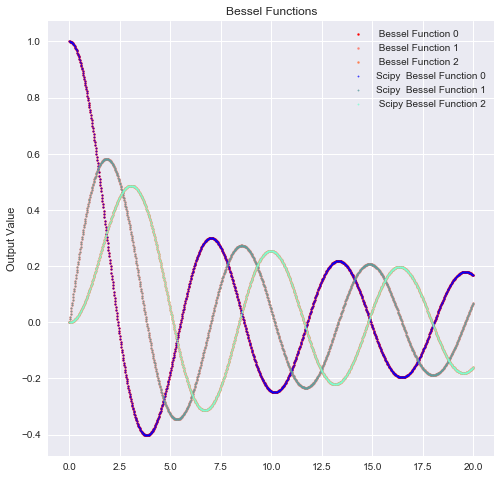

In [13]:
plt.figure(figsize = (8,8))
plt.scatter(x, bessel_val[:,0],c = 'red', s = 4, label = (' Bessel Function 0'))
plt.scatter(x, bessel_val[:,1],c = 'salmon', s = 4, label = (' Bessel Function 1'))
plt.scatter(x, bessel_val[:,2],c = 'coral', s =4, label = (' Bessel Function 2'))
plt.scatter(x, scipy_val[:,0],c = 'blue', s = 2, alpha = 0.7, label = ('Scipy  Bessel Function 0'))
plt.scatter(x, scipy_val[:,1],c ='cadetblue',  s = 2, alpha = 0.8, label = ('Scipy  Bessel Function 1'))
plt.scatter(x, scipy_val[:,2],c = 'aquamarine', s =2, alpha = 0.8, label = (' Scipy Bessel Function 2'))
plt.title('Bessel Functions')
plt.legend()
plt.ylabel('Output Value')
plt.show()

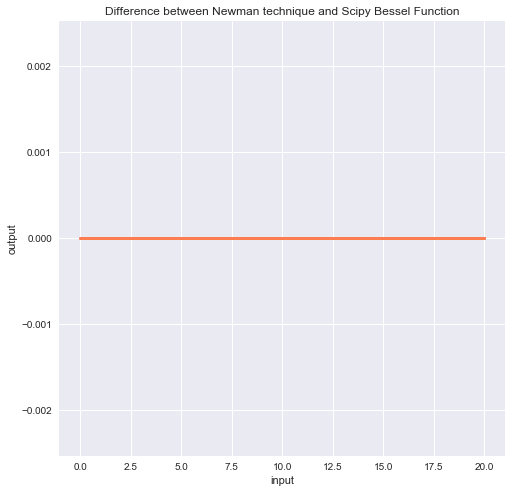

7.991545793173405e-18  Mean Difference for J0
5.625622039965676e-17  Mean Difference for J1
-5.0261263040707787e-17  Mean Difference for J2


In [15]:
plt.figure(figsize = (8,8))
plt.scatter(x, bessel_val[:,0]-scipy_val[:,0],c = 'red', s = 4)
plt.scatter(x, bessel_val[:,1]-scipy_val[:,1],c = 'salmon', s = 4)
plt.scatter(x, bessel_val[:,2]-scipy_val[:,2],c = 'coral', s =4)
plt.title('Difference between Newman technique and Scipy Bessel Function')
plt.xlabel('input')
plt.ylabel('output')
plt.show()
print(np.mean(bessel_val[:,0]-scipy_val[:,0]), ' Mean Difference for J0')
print(np.mean(bessel_val[:,1]-scipy_val[:,1]), ' Mean Difference for J1')
print(np.mean(bessel_val[:,2]-scipy_val[:,2]), ' Mean Difference for J2')

# Answers
As shown in in the graph, the scipy bessel functions match the Newman coded problems quite well. I included a difference between the two plot to show how well they match. There doesn't seem to be a better method of visualizing this. Quantitatively, the average that they differed for each point was of the order of $E-17$ or  $E-18$ 

# 5.4b 
This question asks us to compute a density plot of the intensity of the different diffraction patterns that come from a point light source with $\lambda=500$nm. The question asks us to look in a square region of the focal plane. The formula used is 
\begin{equation}
I(r)=\frac{J_1(kr)}{kr}^2
\end{equation}
The radius range will be $0  \text{ to } 1\mu\text{m}$ and $k = \frac{2\pi}{\lambda}$

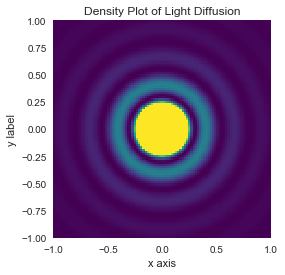

In [16]:
x_grid,y_grid = np.mgrid[-1:1:100j,-1:1:100j]
r = np.sqrt(x_grid**2 + y_grid**2)
wavelength = 0.5
k = 2*np.pi/wavelength

I = (J(1,r*k)/k/r)**2
plt.imshow(I,vmax=0.1/10,extent=(-1,1,-1,1), cmap = 'viridis')
plt.title('Density Plot of Light Diffusion')
plt.xlabel('x axis')
plt.ylabel('y label')
ax = plt.gca()
ax.grid(False)
